In [1]:
####$ Data Definition $####

import numpy as np 



# training dataset 
X = np.array([[1, 1, 1], 
 [3, 40, 1], 
 [4, 20, 10], 
 [5., 3, 1], 
 [5, 3, 2], 
 [6, 40, 1], 
 [8, 9, 2], 
 [9, 3, 4], 
 [11, 100, 12] 
])


y = np.array([10,22,28,39,50,65, 65,80,95])


"""%
X = np.array(XX)
y = np.array(yy)
%"""



'%\nX = np.array(XX)\ny = np.array(yy)\n%'

In [2]:
####$ Model Definition $####

from keras.models import Sequential 
from keras.layers import Dense 
from keras.callbacks import EarlyStopping,  ModelCheckpoint 
#----from delphi_training_callback import DelphiTrainingCallback----

model = Sequential() 
#model.add(Input(shape=(X.shape[1],))) 
model.add(Dense(64, input_shape=(X.shape[1],)))
model.add(Dense(units=32)) 
model.add(Dense(units=16)) 
model.add(Dense(units=1, activation='ReLU')) 
model.compile(loss='mse', optimizer="adam") # , metrics =['mae', 'mape'] 



In [3]:
####$ Model Training $####

callbacks = [] 

"""%
callbacks.append(DelphiTrainingCallback())
%"""

callbacks.append(EarlyStopping(monitor='val_loss',  patience=20, restore_best_weights=True)) 
callbacks.append(ModelCheckpoint('my model weighs.hdf5', monitor='val_loss', save_best_only=True)) 

# Fit the neural model 
history=model.fit(X, y, validation_split=0.2, epochs= 100, callbacks=callbacks) 
print(history.history["val_loss"]) 

Epoch 1/100
1/1 [==============================] - 1s 638ms/step - loss: 1977.0000 - val_loss: 7712.5000
Epoch 2/100
1/1 [==============================] - 0s 23ms/step - loss: 1977.0000 - val_loss: 7712.5000
Epoch 3/100
1/1 [==============================] - 0s 20ms/step - loss: 1977.0000 - val_loss: 7712.5000
Epoch 4/100
1/1 [==============================] - 0s 32ms/step - loss: 1977.0000 - val_loss: 7712.5000
Epoch 5/100
1/1 [==============================] - 0s 27ms/step - loss: 1977.0000 - val_loss: 7712.5000
Epoch 6/100
1/1 [==============================] - 0s 23ms/step - loss: 1977.0000 - val_loss: 7712.5000
Epoch 7/100
1/1 [==============================] - 0s 25ms/step - loss: 1977.0000 - val_loss: 7712.5000
Epoch 8/100
1/1 [==============================] - 0s 26ms/step - loss: 1977.0000 - val_loss: 7712.5000
Epoch 9/100
1/1 [==============================] - 0s 26ms/step - loss: 1977.0000 - val_loss: 7712.5000
Epoch 10/100
1/1 [==============================] - 0s 29ms/ste

In [4]:
####$ Model Testing $####
X_test = [[1, 2, 3], 
 [-1, -2, -10], 
 [10, 10, 10], 
 [100, 4, 50] 
] 

"""{
'''$
}"""
yy_test = [0, 0, 0, 0]
X_test = np.array(X_test)
Y_test = np.array(yy_test)
"""{
$'''
}"""

"""%
X_test = np.array(XX_test)
Y_test = np.array(yy_test)
%"""


predictions = model.predict(X_test) 
for x, y in zip(X_test, predictions): 
    print(x, y)
    
    
yy_pred = predictions.tolist()
errors = (predictions - Y_test).tolist()

[1 2 3] [0.]
[ -1  -2 -10] [0.3426063]
[10 10 10] [0.]
[100   4  50] [0.]


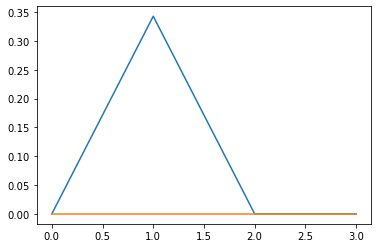

In [5]:
####$ Resulting Plots $####

import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes()

x = range(len(yy_test))
y = yy_pred
plt.plot(x, y)

x = range(len(yy_test))
y = yy_test
plt.plot(x, y)

plt.show()